In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mt
import matplotlib.pyplot as plt
import tensorflow as tsf
import tensorflow.keras as keras
import os
import cv2

In [2]:
dp='C:\\Users\\91600\\vsfolders\\python\\Face mask detection\\Face Mask Dataset\\Train'
cat = os.listdir(dp)

In [3]:
lb=[i for i in range(len(cat))]
lb_dict=dict(zip(cat,lb))
lb_dict

{'WithMask': 0, 'WithoutMask': 1}

In [4]:
dt=[]   
z=[]   

for category in cat:
    fp=os.path.join(dp,category)
    inm= os.listdir(fp)
    
    for img_name in inm:
        ip=os.path.join(fp,img_name)
        img=cv2.imread(ip)
        
        try:
            g=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   
            rz=cv2.resize(g,(224,224))             
            dt.append(rz)
            z.append(lb_dict[category])     
            
        except Exception as e:
            print('Exception:',e)          



In [5]:
dt=np.array(dt)/255.0
dt=np.reshape(dt,(dt.shape[0],224,224,1))
z=np.array(z)

from keras.utils import np_utils

net=np_utils.to_categorical(z)       

In [6]:
np.save('data',dt)
np.save('target',net)

In [7]:
dt.shape

(10000, 224, 224, 1)

In [8]:
#Creating the architecture

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=dt.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


from sklearn.model_selection import train_test_split
train_data,test_data,train_z,test_z=train_test_split(dt,z,test_size=0.2,random_state=45)


In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#SPLITTING THE DATA INTO TEST AND TRAIN
from sklearn.model_selection import train_test_split
train_data,test_data,train_z,test_z=train_test_split(dt,z,test_size=0.2,random_state=45)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
  'model-{epoch:03d}.model',
  monitor='val_loss',
  verbose=0,
  save_best_only=True,
  mode='auto')

history=model.fit(
  train_data,
  train_z,
  epochs=10,
  callbacks=[checkpoint],
  validation_split=0.2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 297s 46ms/sample - loss: 0.3025 - acc: 0.8644 - val_loss: 0.1716 - val_acc: 0.9388
Epoch 2/10
6400/6400 [==============================] - 319s 50ms/sample - loss: 0.1323 - acc: 0.9536 - val_loss: 0.1101 - val_acc: 0.9619
Epoch 3/10
6400/6400 [==============================] - 307s 48ms/sample - loss: 0.0878 - acc: 0.9703 - val_loss: 0.0767 - val_acc: 0.9731
Epoch 4/10
6400/6400 [==============================] - 329s 51ms/sample - loss: 0.0681 - acc: 0.9758 - val_loss: 0.1443 - val_acc: 0.9531
Epoch 5/10
6400/6400 [==============================] - 347s 54ms/sample - loss: 0.0590 - acc: 0.9792 - val_loss: 0.0616 - val_acc: 0.9762
Epoch 6/10
6400/6400 [==============================] - 407s 64ms/sample - loss: 0.0517 - acc: 0.9828 - val_loss: 0.0572 - val_acc: 0.9787
Epoch 7/10
6400/6400 [==

In [9]:
import tensorflow as tf 
model = tf.keras.models.load_model('C:\\Users\\91600\\vsfolders\\python\\Face mask detection\\model-009.model')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:

sample_pics=test_data[:100]
y_final=[]
y=(model.predict(sample_pics) > 0.5).astype("int32")
for i in y:
    y_final.append(i[0])
y_final
final_dict={}
for i in range(len(y_final)):
    if y_final[i]==1:
        final_dict[i]="Without mask"
    else:
        final_dict[i]="With mask"
print(final_dict)


{0: 'With mask', 1: 'Without mask', 2: 'Without mask', 3: 'With mask', 4: 'Without mask', 5: 'Without mask', 6: 'With mask', 7: 'Without mask', 8: 'With mask', 9: 'With mask', 10: 'Without mask', 11: 'Without mask', 12: 'With mask', 13: 'With mask', 14: 'With mask', 15: 'With mask', 16: 'Without mask', 17: 'With mask', 18: 'Without mask', 19: 'With mask', 20: 'With mask', 21: 'Without mask', 22: 'With mask', 23: 'Without mask', 24: 'With mask', 25: 'With mask', 26: 'Without mask', 27: 'With mask', 28: 'Without mask', 29: 'With mask', 30: 'Without mask', 31: 'With mask', 32: 'Without mask', 33: 'With mask', 34: 'With mask', 35: 'With mask', 36: 'With mask', 37: 'With mask', 38: 'Without mask', 39: 'With mask', 40: 'Without mask', 41: 'Without mask', 42: 'Without mask', 43: 'With mask', 44: 'Without mask', 45: 'Without mask', 46: 'Without mask', 47: 'Without mask', 48: 'With mask', 49: 'With mask', 50: 'With mask', 51: 'Without mask', 52: 'With mask', 53: 'Without mask', 54: 'Without mas

AxesImage(54,36;334.8x217.44)


      Without mask


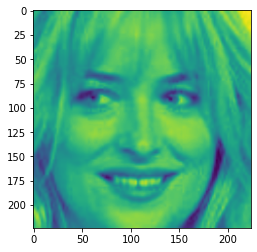

In [17]:
print(plt.imshow(test_data[89].reshape(224,224)))
print("\n\n     ",final_dict[89])


In [13]:
from tensorflow.keras.models import load_model

model.save('model_face.h5')